<a href="https://colab.research.google.com/github/CCarito/Image_classifier/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Image classifier

Image labeling is a daunting task. That's why scientists have been trying to improve methods for automatic image classification due to its practical applications. At the Pozuelo de Alarcón post office, they want to implement a model that can classify letters according to the postal code written on them. To achieve this, we will create a classifier that, by reading a handwritten number, can determine what it is. This classifier will work by using a training set to find a plane that separates different classes arranged in an n-dimensional space based on their characteristics.

We will use the "load_digits" dataset and the library set found in scikit-learn to address the following issues:

1 - Create a classifier that can determine what number an image represents. Make at least two configurations and draw a table showing the accuracy of the classifications.

2 - Choose 5 numbers that you have not used to train or evaluate the model, and classify them. Use the best performing model from the previous step. Indicate the error rate at which the classifier worked.

## Model selection

For the described problem, a decision tree-based model or support vector machines (SVM) can be effective. Both are suitable for data classification and can handle multiple features for classification, as required in the problem.

Rule-based models can be useful in situations where features are very specific and easy to define in terms of clear rules, but in this case, there may be a lot of variability in how numbers are written, which could make it difficult to define precise rules.

K-nearest-neighbors and Bayesian networks algorithms can also be useful in data classification, but in this case, due to the nature of the features and the complexity of the problem, it is suggested to use a decision tree or SVM.

### Installation

In [ ]:
!pip install sklearn
!pip install numpy
!pip install matplotlib

### Libraries

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

### To import a dataset and display its contents

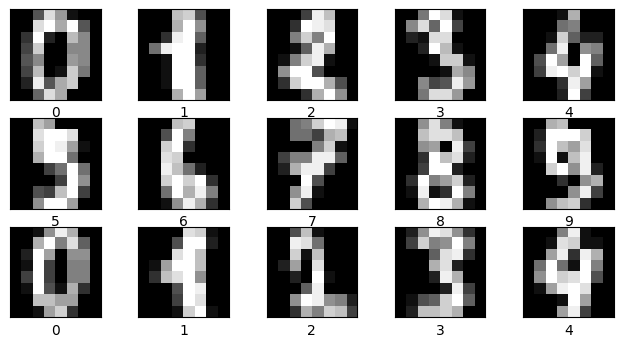

In [ ]:
# Step 1: Load the "load_digits" dataset from the scikit-learn library
digits = load_digits()

# Selecting the first 15 images from the dataset
images = digits.images[:15]

# To print the images
fig, ax = plt.subplots(3, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(digits.target[i])
plt.show()

In [ ]:
# Step 2: Split the dataset into a training set, a test set, and a validation set
X_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, train_size = 0.8, random_state=42)
"""
X_train = Conjunto de datos para el entrenamiento,
X_test  = Conjunto de datos para realizar el test,
y_train = Conjunto de etiquetas para el entrenamiento,
y_test  = Conjunto de etiquetas de prueba."""

X_test, X_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, train_size=0.8, random_state=42)

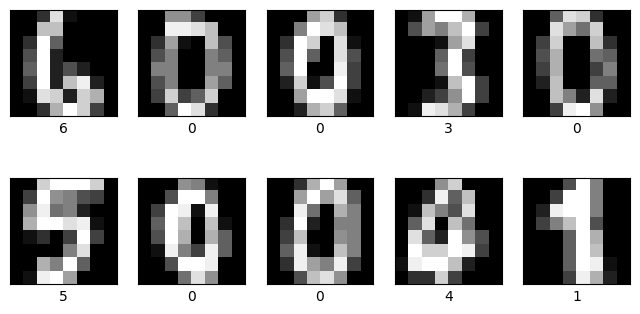

In [ ]:
# Select the first 10 images from the training set
images = X_train[:10]

# Print the images
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i].reshape(8,8), cmap='gray') # Resize the image to 8x8 and apply the color map 'gray'
    axi.set(xticks=[], yticks=[]) # Remove x and y axes
    axi.set_xlabel(y_train[i]) # Add the target label as the title
plt.show()

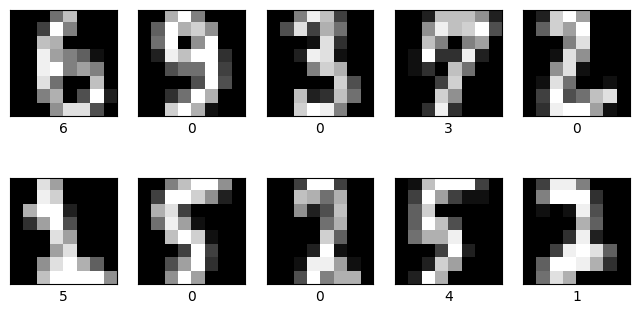

In [ ]:
# Select the first 10 images from the testing set
images = X_test[:10]

# Print the images
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i].reshape(8,8), cmap='gray') # Resize the image to 8x8 and apply the color map 'gray'
    axi.set(xticks=[], yticks=[]) # Remove x and y axes
    axi.set_xlabel(y_train[i]) # Add the target label as the title
plt.show()

In [ ]:
print(y_train)

[6 0 0 ... 2 7 1]


In [ ]:
print(y_test)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]


## Decision tree model

In [ ]:
# Step 3: import library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Step 4: Create a "Decision Tree" model using the scikit-learn library
"""class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
class_weight=None, ccp_alpha=0.0)"""

# Varying the input parameters can lead to different models

### Method 1

In [ ]:
# Step 5: Configuration and evaluation of Model 1
model1 = DecisionTreeClassifier(criterion = 'log_loss', max_depth=5, min_samples_split=4, max_features='sqrt')

# Create the classifier using the training data
model1.fit(X_train, y_train)

# Predict the class value 
y_pred1 = model1.predict(X_test)

# Model accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print("Precisión del modelo: {:.2f}%".format(accuracy1*100))

Precisión del modelo: 68.06%


### Method 2

In [ ]:
# Paso 6: Configuration and evaluation of Model 2
model2 = DecisionTreeClassifier(criterion = 'entropy', max_features='sqrt')

# Create the classifier using the training data
model2.fit(X_train, y_train)

# Predict the class value 
y_pred2 = model2.predict(X_test)

# Model accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print("Precisión del modelo: {:.2f}%".format(accuracy2*100))

Precisión del modelo: 83.89%


### Table

In [ ]:
from tabulate import tabulate

table = [["Modelo 1", "{:.2f}%".format(accuracy1*100)],
         ["Modelo 2", "{:.2f}%".format(accuracy2*100)]]

headers = ["Modelo", "Precisión"]

print(tabulate(table, headers, tablefmt="grid"))

+----------+-------------+
| Modelo   | Precisión   |
+==========+=============+
| Modelo 1 | 68.06%      |
+----------+-------------+
| Modelo 2 | 83.89%      |
+----------+-------------+


### Model validation

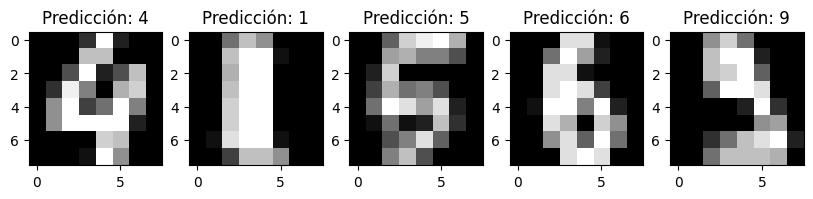

Precisión del modelo: 100.00%


In [ ]:
# Predict the class value
pred= model2.predict(X_val[:5])

# Calculate the accuracy of the model on the validation data
accuracy = accuracy_score(y_val[:5], pred)

# Print the input image along with its prediction
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_val[i].reshape(8, 8), cmap='gray')
    ax.set_title("Predicción: {}".format(pred[i]))
plt.show()

print("Precisión del modelo: {:.2f}%".format(accuracy*100))


## Support Vector Machines model

In [ ]:
# Step 3: import library
from sklearn.svm import SVC

In [ ]:
# Step 4: Create a "Support Vector Machines" model using the scikit-learn library
"""class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, 
random_state=None)"""

# Varying the input parameters can lead to different models

### Method 1

In [ ]:
# Step 5: Configuration and evaluation of Model 1
model1 = SVC(kernel='linear')

# Create the classifier using the training data
model1.fit(X_train, y_train)

# Predict the class value 
y_pred1 = model1.predict(X_test)

# Model accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print("Precisión del modelo: {:.2f}%".format(accuracy1*100))

Precisión del modelo: 97.92%


### Method 2

In [ ]:
# Step 6: Configuration and evaluation of Model 2
model2 = SVC(kernel='poly', degree=5, shrinking=False, gamma='auto', probability=True, break_ties=True)

# Create the classifier using the training data
model2.fit(X_train, y_train)

# Predict the class value  
y_pred2 = model1.predict(X_test)

# Model accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print("Precisión del modelo: {:.2f}%".format(accuracy2*100))

Precisión del modelo: 97.92%


### Table

In [ ]:
from tabulate import tabulate

table = [["Modelo 1", "{:.2f}%".format(accuracy1*100)],
         ["Modelo 2", "{:.2f}%".format(accuracy2*100)]]

headers = ["Modelo", "Precisión"]

print(tabulate(table, headers, tablefmt="grid"))

+----------+-------------+
| Modelo   | Precisión   |
+==========+=============+
| Modelo 1 | 97.92%      |
+----------+-------------+
| Modelo 2 | 97.92%      |
+----------+-------------+


### Model validation

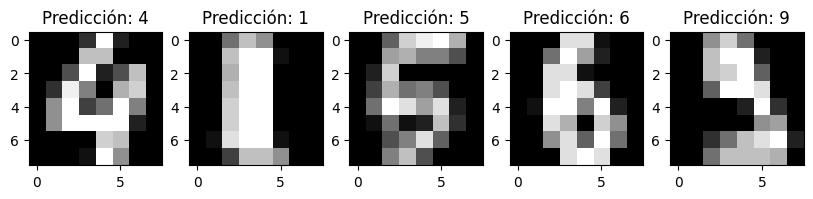

Precisión del modelo: 100.00%


In [ ]:
# Predict the class value
pred= model1.predict(X_val[:5])

# Calculate the accuracy of the model on the validation data
accuracy = accuracy_score(y_val[:5], pred)

# Print the input image along with its prediction
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_val[i].reshape(8, 8), cmap='gray')
    ax.set_title("Predicción: {}".format(pred[i]))
plt.show()

print("Precisión del modelo: {:.2f}%".format(accuracy*100))

## Conclusion

In conclusion, image labeling is an important and complex task that can be addressed using different classification algorithms such as decision trees and SVMs. In this case, the "load_digits" dataset from scikit-learn was used to train and evaluate various models, obtaining a maximum accuracy of 97.92% with linear and polynomial SVM models. Decision tree models achieved lower accuracies, with a maximum of 83.89%. Overall, SVM models seem to be more suitable for this type of image classification task.